## Read Pre-calculated Hetionet Statistics for Metapaths and Paths

### Hetionet metapaths statistics for the pairs of Biological Process (BP) and Gene (G)
### Filtered out the metapaths with length 3

In [1]:
import pandas as pd

# Read pickle file
hetio_mp3_df = pd.read_pickle('./input/pre_cal_hetionet_metapaths_BP_G_MPL3.pkl')

# Preview the data
display(hetio_mp3_df.head(2))

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131035,GO:0000012,10396,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,14539,12232813
1,3131036,GO:0000012,80223,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,32981,12232813


In [2]:
print(f"#of precalculated metapaths statistics for the pairs of Biological Process (BP) and Gene (G) Metapaths with length 3: {hetio_mp3_df.shape[0]}")

#of precalculated metapaths statistics for the pairs of Biological Process (BP) and Gene (G) Metapaths with length 3: 46396080


### Filtered out GO with Metapaths length 3 and Path counts 1

In [3]:
hetio_mp3_pc1_df=hetio_mp3_df[hetio_mp3_df['path_count']==1]
hetio_mp3_pc1_df=hetio_mp3_pc1_df.reset_index(drop=True)
display(hetio_mp3_pc1_df.head(2))

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131035,GO:0000012,10396,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,14539,12232813
1,3131036,GO:0000012,80223,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,32981,12232813


In [4]:
print(hetio_mp3_pc1_df.shape)

(415952, 17)


### Plot Histogram with Box and Strip Plot

This section defines a function to visualize the distribution of a selected metric using a combined histogram with KDE curve and a vertically stacked box and strip plot. The function allows customization of colors and saving the plot in different formats.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import gaussian_kde
from matplotlib import font_manager
import numpy as np

def plot_hist_box_strip(
    df, column, bins=50, decimals=4,
    hist_color=None, kde_color='black',
    box_color=None, strip_color=None, jitter=0.2,
    save=False, save_path="plot"
):
    if hist_color is None:
        hist_color = sns.color_palette("colorblind")[9]
    if kde_color is None:
        kde_color = 'black'
    if box_color is None:
        box_color = hist_color
    if strip_color is None:
        strip_color = sns.color_palette("colorblind")[7]

    data = df[column].dropna()
    bold_font = font_manager.FontProperties(weight='bold')

    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1.2, 3], 'hspace': 0})
    ax2, ax1 = axes

    # --- Box + Strip Plot (top) ---
    sns.stripplot(
        x=data, ax=ax2, color=strip_color, size=0.2,
        jitter=jitter, alpha=0.6, zorder=1
    )
    sns.boxplot(
        x=data, ax=ax2, color=box_color, linewidth=2,
        fliersize=0, notch=True, width=0.4, zorder=2
    )
    ax2.set_xticks([]); ax2.set_yticks([])
    ax2.set_xlabel(''); ax2.set_ylabel('')
    ax2.tick_params(bottom=False, left=False)
    ax2.grid(False)
    sns.despine(ax=ax2, left=True, bottom=True)
    ax2.spines['bottom'].set_color('black')

    # --- Histogram + KDE (bottom) ---
    counts, bin_edges, _ = ax1.hist(
        data, bins=bins, color=hist_color,
        edgecolor='black', alpha=0.7
    )
    kde = gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 1000)
    kde_vals = kde(x_vals) * len(data) * (bin_edges[1] - bin_edges[0])
    ax1.plot(x_vals, kde_vals, color=kde_color, linewidth=2)

    ax1.set_xlabel(column, fontsize=14, fontweight='bold', color='black')
    ax1.set_ylabel('Count', fontsize=14, fontweight='bold', color='black')
    ax1.tick_params(axis='both', labelsize=12)

    def smart_format(x, _): return f"{x:.{decimals}f}"
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(smart_format))

    for label in ax1.get_xticklabels() + ax1.get_yticklabels():
        label.set_fontproperties(bold_font)

    ax1.grid(False)
    sns.despine(ax=ax1)
    ax1.spines['bottom'].set_color('black')
    ax1.spines['left'].set_color('black')

    plt.tight_layout()

    if save:
        fig.savefig(f"{save_path}.jpeg", format='jpeg', dpi=600)
        fig.savefig(f"{save_path}.pdf", format='pdf', dpi=600)

    plt.show()


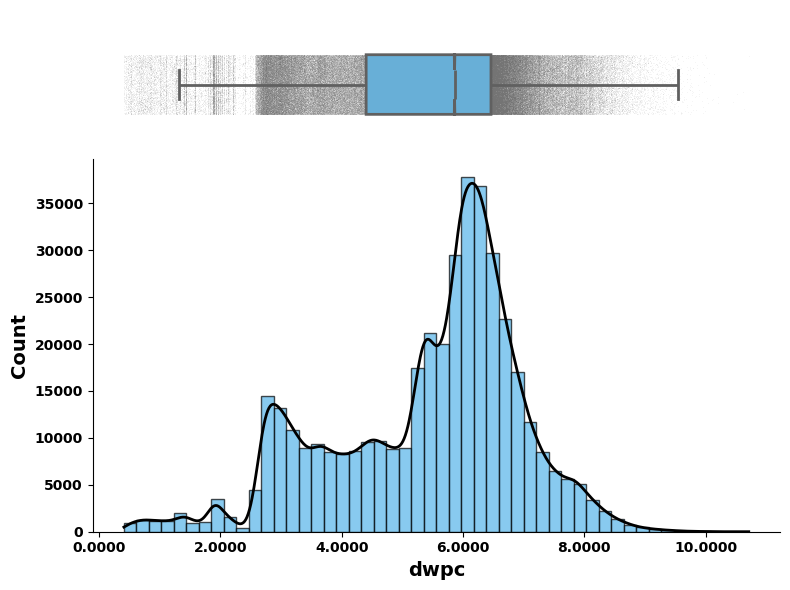

In [6]:
plot_hist_box_strip(hetio_mp3_pc1_df, 'dwpc', save=True, save_path=f"./output/dwpc_distribution")

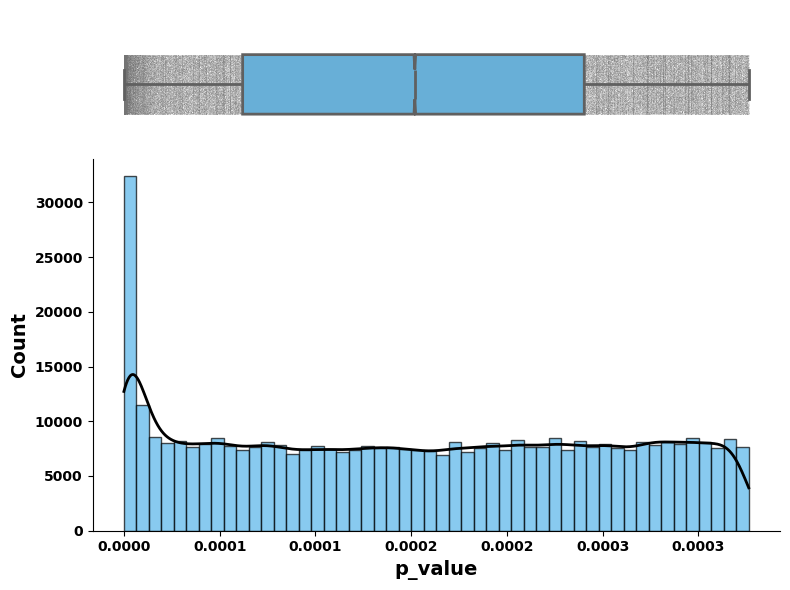

In [7]:

plot_hist_box_strip(hetio_mp3_pc1_df, 'p_value', save=True, save_path=f"./output/p_value_distribution")

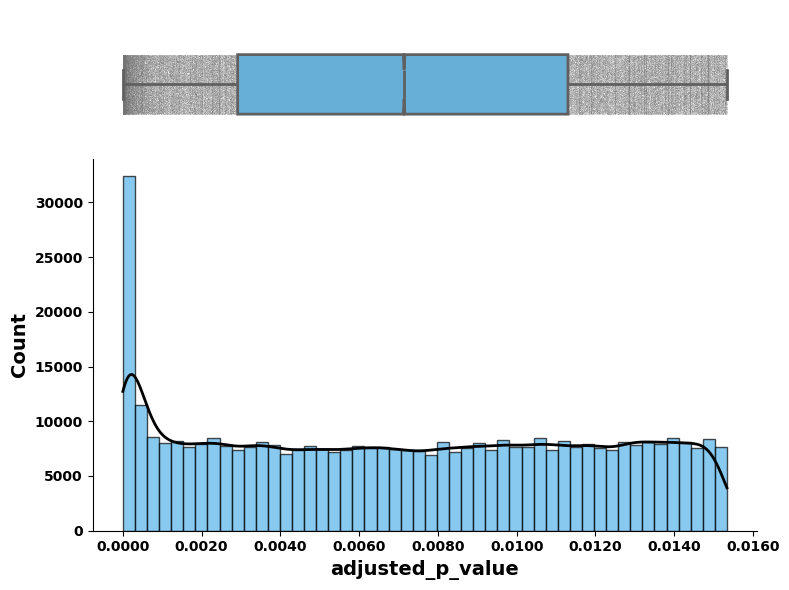

In [8]:
plot_hist_box_strip(hetio_mp3_pc1_df, 'adjusted_p_value', save=True, save_path=f"./output/adjusted_p_value_distribution")



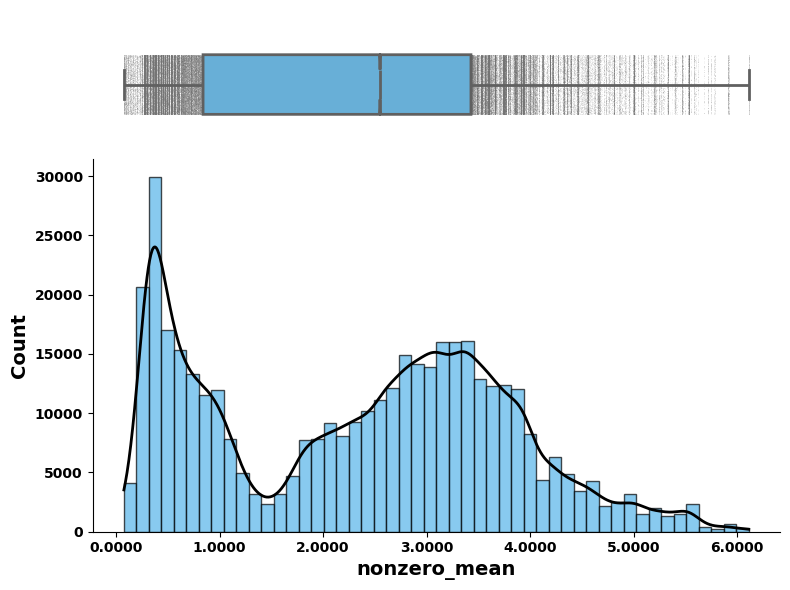

In [9]:


plot_hist_box_strip(hetio_mp3_pc1_df, 'nonzero_mean', save=True, save_path=f"./output/nonzero_mean_distribution")

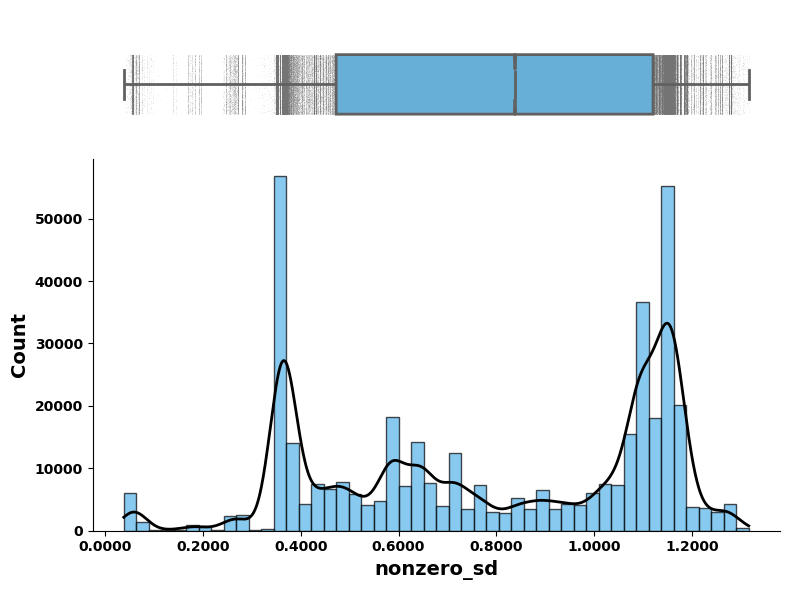

In [11]:

plot_hist_box_strip(hetio_mp3_pc1_df, 'nonzero_sd', save=True, save_path=f"./output/nonzero_sd_distribution")